In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,auc,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
import seaborn as sns 


In [5]:
DATA_PATH = "hands_on_datasets/mushrooms.csv"
data = pd.read_csv(DATA_PATH)

In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

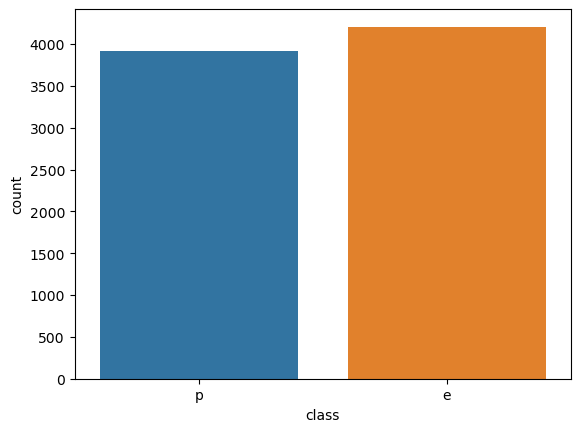

In [16]:
sns.countplot(x = data["class"])

## Preprocessing
#### Null Check

In [18]:
for col in data.columns:
    print(f"{col}:{data[col].isnull().sum()}")

class:0
cap-shape:0
cap-surface:0
cap-color:0
bruises:0
odor:0
gill-attachment:0
gill-spacing:0
gill-size:0
gill-color:0
stalk-shape:0
stalk-root:0
stalk-surface-above-ring:0
stalk-surface-below-ring:0
stalk-color-above-ring:0
stalk-color-below-ring:0
veil-type:0
veil-color:0
ring-number:0
ring-type:0
spore-print-color:0
population:0
habitat:0


In [20]:
le = LabelEncoder()
original_data = data.copy()
data["class"] = le.fit_transform(data["class"])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [21]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Model Training 
### Logistic Regression

In [37]:
log_reg = LogisticRegression()
X = encoded_data.drop(["class"],axis = 1)
y = encoded_data["class"].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
log_reg.fit(X_train,y_train)    
y_prob = log_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>0.5,1,0)

/Users/yakupcanergen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, ..., 1, 1, 1])

In [39]:
log_confusion_matrix = confusion_matrix(y_test,y_pred)
log_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [42]:
false_positive,true_positive,th = roc_curve(y_test,y_prob)
roc_auc = auc(false_positive,true_positive)
roc_auc

1.0

In [57]:
def plot_auc(roc_auc,model_name):
    plt.figure(figsize=(5,5))
    plt.title(f"ROC for {model_name}")
    plt.plot(false_positive,true_positive,color="r",label=f"AUC{roc_auc:.2f}")
    plt.plot([0,1],[0,1],linestyle = "--")
    plt.legend(loc="lower right")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")

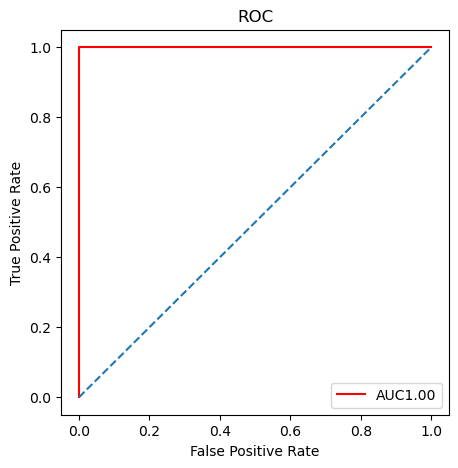

In [48]:
plot_auc(roc_auc)

### Linear Discriminant Analysis

In [55]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train.ravel())
y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob_lda>0.5,1,0)
lda_fp,lda_tp,lda_th = roc_curve(y_test,y_prob_lda)
lda_auc = auc(lda_fp,lda_tp)
lda_auc


1.0

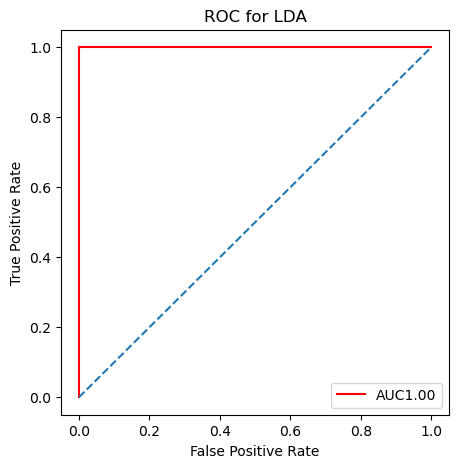

In [58]:
plot_auc(lda_auc,"LDA")

### Quadratic Discriminant Analysis

In [60]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train.ravel())
y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob_qda>0.5,1,0)
qda_fp,qda_tp,qda_th = roc_curve(y_test,y_prob_qda)
qda_auc = auc(qda_fp,qda_tp)
qda_auc


/Users/yakupcanergen/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


1.0

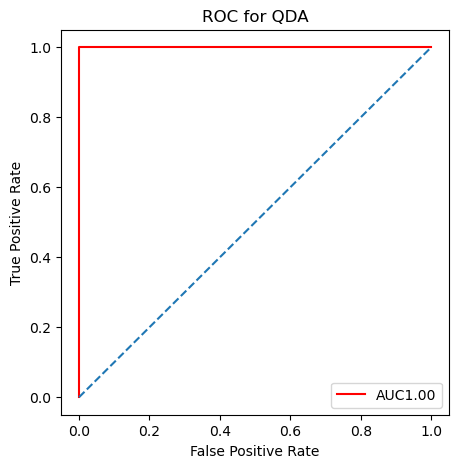

In [61]:
plot_auc(qda_auc,"QDA")